In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from matplotlib import pyplot as plt 
import os 
import cv2 #to reduce image operations
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator 

In [3]:
imageHeight = 1024
imageWidth = 1024
# Path of the images stored directory
mainDirectory = "C:/Users/laksh/Downloads/Diseases Only/Diseases Only/"

Categories = ["Tumour", "Alzheimer", "Stroke"] 

TumourData = []
AlzheimerData = []
StrokeData = []
for classess in Categories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       # Rsizing the images to 512 * 512
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "Tumour":
         TumourData.append(image_array)
       elif classess == "Alzheimer":
         AlzheimerData.append(image_array)
       elif classess == "Stroke":
         StrokeData.append(image_array)
       

# Converting the lists into numpy arrays for tumour types
TumourData = np.array(TumourData)
AlzheimerData = np.array(AlzheimerData)
StrokeData = np.array(StrokeData)

In [4]:
TumourData.shape

(5023, 1024, 1024, 3)

In [5]:
AlzheimerData.shape

(3019, 1024, 1024, 3)

In [6]:
StrokeData.shape

(1202, 1024, 1024, 3)

In [7]:
generatedData = ImageDataGenerator(
    rotation_range = 15, #rotate image to 45 degrees
    zoom_range = 0.01, # zoom image from 0.15 in and out
    horizontal_flip= True, # flip image horizontally
    fill_mode= "constant", # gap filler after augmentation with the nearest pixel value
    shear_range= 0.05,
    cval=0 # fills black around the image
) 

def augementData(image_dataset_type, path, prefix, value):
    for x in image_dataset_type:
        x = x.reshape(1, 1024, 1024, 3)
        count = 0
        for batches in generatedData.flow(x, 
                                      batch_size=16, 
                                      save_to_dir=path,
                                      save_prefix=prefix,
                                      save_format="jpg"):
            count += 1
            if count > value:
                break

In [8]:
augementData(TumourData, "C:/Users/laksh/Downloads/Diseases Only/Augmented/AugmentedTumour", "aug_tumour", 6)

In [12]:
augementData(AlzheimerData, "C:/Users/laksh/Downloads/Diseases Only/Augmented/AugmentedAlzheimer", "aug_alzheimer", 10)

In [7]:
generatedData = ImageDataGenerator(
    rotation_range = 15, #rotate image to 45 degrees
    zoom_range = 0.2, # zoom image from 0.15 in and out
    horizontal_flip= True, # flip image horizontally
    fill_mode= "constant", # gap filler after augmentation with the nearest pixel value
    shear_range= 0.1,
    cval=0 # fills black around the image
) 

def augementData(image_dataset_type, path, prefix, value):
    for x in image_dataset_type:
        x = x.reshape(1, 1024, 1024, 3)
        count = 0
        for batches in generatedData.flow(x, 
                                      batch_size=16, 
                                      save_to_dir=path,
                                      save_prefix=prefix,
                                      save_format="jpg"):
            count += 1
            if count > value:
                break          

In [8]:
augementData(StrokeData, "C:/Users/laksh/Downloads/Diseases Only/Augmented/AugmentedStroke", "aug_stroke", 20)

In [11]:
mainDirectory = "C:/Users/laksh/Downloads/Diseases Only/Augmented/"
imageHeight = 256
imageWidth = 256

Categories = ["AugmentedTumour", "AugmentedAlzheimer", "AugmentedStroke"] 

TumourData = []
AlzheimerData = []
StrokeData = []

for classess in Categories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "AugmentedTumour":
          TumourData.append(image_array)
       elif classess == "AugmentedAlzheimer":
          AlzheimerData.append(image_array)
       elif classess == "AugmentedStroke":
          StrokeData.append(image_array)
          
TumourData = np.array(TumourData)
AlzheimerData = np.array(AlzheimerData)
StrokeData = np.array(StrokeData)

In [12]:
TumourData.shape, AlzheimerData.shape, StrokeData.shape

((9693, 256, 256, 3), (9645, 256, 256, 3), (9187, 256, 256, 3))

In [14]:
# Define the gamma value
gamma = 1.5

# Function to apply gamma correction
def applyGammaCorrection(images, gamma):
    for index in range(0, len(images)):
          # Normalize pixel values to the range [0, 1]
          normalized_image = images[index] / 255.0
    
          # Apply gamma correction
          corrected_image = np.power(normalized_image, gamma)
    
          # Denormalize the image to the original range [0, 255]
          corrected_image = (corrected_image * 255).astype(np.uint8)
    
          images[index] = corrected_image
      
    
applyGammaCorrection(TumourData, gamma)
applyGammaCorrection(AlzheimerData, gamma)
applyGammaCorrection(StrokeData, gamma)

In [17]:
import gc  #delete garbage otherwise there is a memory issue
gc.collect()

Categories = ["Tumour", "Alzheimer", "Stroke"]

# Combine image data and labels
allImages = np.concatenate([TumourData, AlzheimerData, StrokeData], axis=0)

# Create corresponding labels based on the class names
allLabels = np.concatenate([
    np.full(len(TumourData), "Tumour"),   
    np.full(len(AlzheimerData), "Alzheimer"), 
    np.full(len(StrokeData), "Stroke"),
], axis=0)

In [18]:
import gc 
gc.collect()

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(allImages, allLabels, test_size=0.3, random_state=4) 

In [20]:
from sklearn.preprocessing import LabelEncoder
# Use fit_transform on the training set
labelEncoder = LabelEncoder()
train_y_encoded = labelEncoder.fit_transform(train_y)

# Use transform on the test set
test_y_encoded = labelEncoder.transform(test_y)

# Main directory to store training and testing data
mainDataDirectory = "C:/Users/laksh/Downloads/Diseases Only/Final/"

# Making two directories for both training and testing data sets
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Categories of tumour classification
tumourCategories = ["Alzheimer", "Stroke", "Tumour", ]

# Creating the subdirectories by checking whether they already exist
for category in tumourCategories:
    os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
    os.makedirs(os.path.join(testDirectory, category), exist_ok=True)

# Save training images
for i in range(len(train_x)):
    category = tumourCategories[int(train_y_encoded[i])]
    filename = f"{category}_train_{i}.jpg"
    filepath = os.path.join(trainDirectory, category, filename)
    cv2.imwrite(filepath, train_x[i])
    
# Save testing images
for i in range(len(test_x)):
    category = tumourCategories[int(test_y_encoded[i])]
    filename = f"{category}_test_{i}.jpg"
    filepath = os.path.join(testDirectory, category, filename)
    cv2.imwrite(filepath, test_x[i])

In [3]:
import os
import cv2

# Define Categories and other variables
Categories = ["Tumour", "Alzheimer", "Stroke"]
mainDataDirectory = "C:/Users/laksh/Downloads/Diseases Only/Final/"

# Directories for training and testing data
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Function to read images from a directory
def read_images_from_directory(directory):
    images = []
    labels = []
    for category in Categories:
        category_path = os.path.join(directory, category)
        label = Categories.index(category)  # Assign numeric label
        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            try:
                # Read image using OpenCV
                image = cv2.imread(image_path)
                if image is not None:
                    images.append(image)
                    labels.append(label)
                else:
                    print(f"Error reading image: {image_path}")
            except Exception as e:
                print(f"Error processing image: {image_path}. Exception: {e}")
    return images, labels

# Example usage:
train_images, train_labels = read_images_from_directory(trainDirectory)
test_images, test_labels = read_images_from_directory(testDirectory)


In [5]:
train_x = test_images
train_y = train_labels
test_x = test_images
test_y = test_labels

Text(0.5, 1.0, '1')

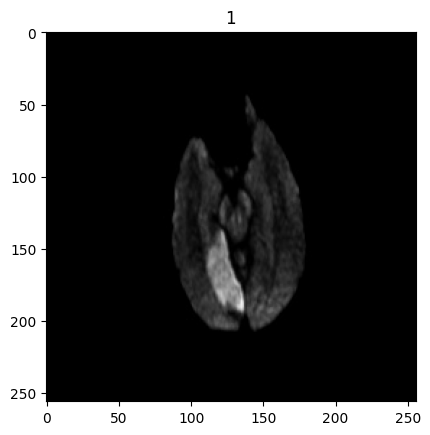

In [6]:
plt.imshow(test_x[7000])
plt.title(train_y[7000])

In [7]:
# Convert the lists to numpy arrays
train_x = np.array(train_images)
train_y = np.array(train_labels)
test_x = np.array(test_images)
test_y = np.array(test_labels)

In [12]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming train_y contains your labels
label_encoder = LabelEncoder()
train_y_encoded = label_encoder.fit_transform(train_y)
test_y_encoded = label_encoder.fit_transform(test_y)

# Convert encoded labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y_encoded, num_classes=3)  
test_y_one_hot = to_categorical(test_y_encoded, num_classes=3)

In [12]:
from keras.applications import VGG19
from keras import models
from keras import layers
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))  
 
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=5, batch_size=2, validation_data=(test_x, test_y_one_hot))

Epoch 1/5
9984/9984 [==============================] - 6581s 659ms/step - loss: 0.2767 - accuracy: 0.9980 - val_loss: 0.0930 - val_accuracy: 0.9998
Epoch 2/5
9984/9984 [==============================] - 6315s 632ms/step - loss: 0.0336 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
9984/9984 [==============================] - 6352s 636ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
9984/9984 [==============================] - 6403s 641ms/step - loss: 0.0202 - accuracy: 0.9998 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
9984/9984 [==============================] - 6293s 630ms/step - loss: 0.0368 - accuracy: 0.9999 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [14]:
# Save the trained model
model.save('vgg19_multi_disease.h5')

In [8]:
from keras.models import load_model

# Load the model
model = load_model('vgg19_multi_disease.h5')

# Print the model summary
model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               8388864   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 771       
                                                                 
Total params: 23104323 (88.14 MB)
Trainable params: 8389635 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [14]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_x,test_y_one_hot)
print(f'Test accuracy: {test_acc}')

268/268 [==============================] - 2927s 11s/step - loss: 0.0000e+00 - accuracy: 1.0000
Test accuracy: 1.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Map string labels to integer labels
label_mapping = {'Tumor': 0, 'Alzheimer': 1, 'Stroke': 3}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

268/268 [==============================] - 1502s 6s/step


In [17]:
# Convert one-hot encoded test labels back to integers
true_classes = test_y

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm

array([[2954,    0,    0],
       [   0, 2885,    0],
       [   0,    0, 2719]], dtype=int64)

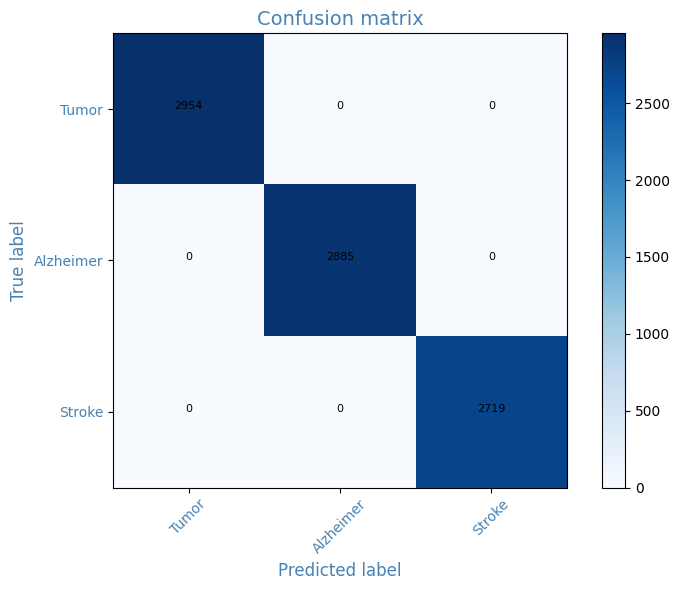

In [18]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    if normalize:
        y_true = y_true.astype('float') / y_true.sum(axis=0, keepdims=True)
        title = 'Normalized confusion matrix'
    
    # Define custom colors for the plot
    blue, green = "#4682B4", "#008000"
    
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.imshow(confusion_matrix(y_true, y_pred), interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14, color=blue)  # Adjust title fontsize and color
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10, color=blue)  # Use blue for the ticks
    plt.yticks(tick_marks, classes, fontsize=10, color=blue)  # Use blue for the ticks

    fmt = '.2f' if normalize else 'd'
    thresh = y_true.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(y_true[i] if normalize else cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if y_true[i] > thresh else "black", fontsize=8)
    plt.ylabel('True label', fontsize=12, color=blue)  # Use blue for the labels
    plt.xlabel('Predicted label', fontsize=12, color=blue)  # Use blue for the labels
    plt.tight_layout()

# Plot non-normalized confusion matrix with a blue and green theme (Blues)
plot_confusion_matrix(true_classes, predicted_classes, classes=label_mapping.keys(), normalize=False, cmap=plt.cm.Blues)

plt.show()

In [19]:
from sklearn.metrics import classification_report
import pandas as pd

disease = {0: 'Tumour', 1: 'Alzheimer', 2:'Stroke'}


# Mapping actual and predicted classes to disease names
actual_classes = [disease[x] for x in true_classes]
predict_classes = [disease[x] for x in predicted_classes]

# Generate classification report
report = classification_report(actual_classes, predict_classes, output_dict=True)

# Convert classification report to DataFrame
classification_df = pd.DataFrame(report)

classification_df

,Alzheimer,Stroke,Tumour,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0
support,2885.0,2719.0,2954.0,1.0,8558.0,8558.0


In [9]:
import numpy as np

label_mapping = {0: 'Tumour', 1: 'Alzheimer', 2:'Stroke'}                     
image = np.expand_dims(train_x[8252], axis=0)                                 
class_name = np.argmax(model.predict(image))                                  
label_mapping[class_name]                                                     

1/1 [==============================] - 1s 955ms/step


'Alzheimer'

Text(0.5, 1.0, '1')

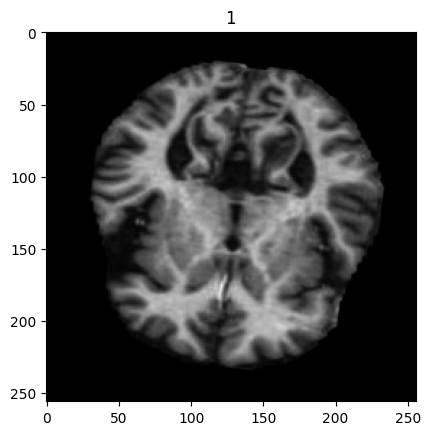

In [10]:
plt.imshow(train_x[8252])
plt.title(train_y[8252])

In [21]:
image = np.expand_dims(train_x[1250], axis=0) 
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 0s 141ms/step


'Tumour'

Text(0.5, 1.0, '0')

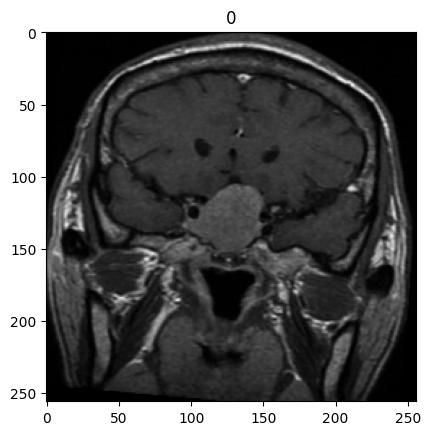

In [20]:
plt.imshow(train_x[1250])
plt.title(train_y[1250])